In [5]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(CellChat)
library(ComplexHeatmap)
ggstyle = theme_bw()+theme(
            axis.line = element_line(colour = "black"),
            panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            panel.border = element_blank(),
            panel.background = element_blank(),
            axis.text.x=element_text(angle = 45, vjust = 1, hjust = 1, size=12, colour = "black"),
            axis.text.y=element_text(size=12, colour = "black"),
            text=element_text(size=12, colour = "black"),
#             legend.title = element_blank(),legend.text=element_text(size=12),
            plot.title = element_text(size = 14, hjust=0.5,vjust = 0.5, 
            margin = margin(l=100,r=50,t=10,b=10),face = "bold", colour = "black"))



## Lin+

In [3]:

O_RT.data <- Read10X(data.dir = "GSE207706_RAW/GSM6310683_C57_RT_Linpos_Rep1")
O_RT <- CreateSeuratObject(counts = O_RT.data, min.cells=3, project = "C57_COLD_Rep1_LP_SoupX")
O_RT$Replicate <- "Rep1"
O_RT$Treatment <- "CONTROL"
#str(O_RT) #5285
############################################################################
O_6C.data <- Read10X(data.dir = "GSE207706_RAW/GSM6310685_C57_COLD_Linpos_Rep1")
O_6C <- CreateSeuratObject(counts = O_6C.data, min.cells=3, project = "C57_COLD_Rep1_LP_SoupX")
O_6C$Replicate <- "Rep1"
O_6C$Treatment <- "COLD"
#str(O_6C) #9379
############################################################################
R_RT.data <- Read10X(data.dir = "GSE207706_RAW/GSM6310689_C57_RT_Linpos_Rep2")
R_RT <- CreateSeuratObject(counts = R_RT.data, min.cells=3, project = "C57_COLD_Rep1_LP_SoupX")
R_RT$Replicate <- "Rep2"
R_RT$Treatment <- "CONTROL"
#str(R_RT) #5305
############################################################################
R_6C.data <- Read10X(data.dir = "GSE207706_RAW/GSM6310691_C57_COLD_Linpos_Rep2")
R_6C <- CreateSeuratObject(counts = R_6C.data, min.cells=3, project = "C57_COLD_Rep1_LP_SoupX")
R_6C$Replicate <- "Rep2"
R_6C$Treatment <- "COLD"


In [4]:

#Subset
O_RT[["percent.mt"]] <- PercentageFeatureSet(O_RT, pattern = "^mt-")
O_6C[["percent.mt"]] <- PercentageFeatureSet(O_6C, pattern = "^mt-")
R_RT[["percent.mt"]] <- PercentageFeatureSet(R_RT, pattern = "^mt-")
R_6C[["percent.mt"]] <- PercentageFeatureSet(R_6C, pattern = "^mt-")
O_RT <- subset(O_RT, subset = percent.mt < 10 & nCount_RNA < 15000 & nFeature_RNA < 4000)
O_6C <- subset(O_6C, subset = percent.mt < 10 & nCount_RNA < 15000 & nFeature_RNA < 4000)
R_RT <- subset(R_RT, subset = percent.mt < 10 & nCount_RNA < 15000 & nFeature_RNA < 4000)
R_6C <- subset(R_6C, subset = percent.mt < 10 & nCount_RNA < 15000 & nFeature_RNA < 4000)


In [5]:
###################
#Normalize
###################
O_RT <- NormalizeData(O_RT)
O_6C <- NormalizeData(O_6C)
R_RT <- NormalizeData(R_RT)
R_6C <- NormalizeData(R_6C)


In [6]:
###################
#Merge
###################
#https://satijalab.org/seurat/v3.1/merge_vignette.html
OGnorm <- merge(O_RT, y = O_6C, project = "OG_Linpos", merge.data = TRUE)
RTnorm <- merge(R_RT, y = R_6C, project = "RT_Linpos", merge.data = TRUE)

###################
#Find Variable Features
###################
OGnorm <- FindVariableFeatures(OGnorm, selection.method = "vst", nfeatures = 2000)
RTnorm <- FindVariableFeatures(RTnorm, selection.method = "vst", nfeatures = 2000)


Warning message in CheckDuplicateCellNames(object.list = objects):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Warning message in CheckDuplicateCellNames(object.list = objects):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”


In [7]:
###################
###################
#Integrate
#######################dim = 20, res 0.25
LPanchors20 <- FindIntegrationAnchors(object.list = list(OGnorm, RTnorm), dims = 1:20) 


Warning message in CheckDuplicateCellNames(object.list = object.list):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 24637 anchors

Filtering anchors

	Retained 16264 anchors



In [9]:
Linpos_mi_d20 <- IntegrateData(anchorset = LPanchors20, dims = 1:20)


Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [10]:
saveRDS(Linpos_mi_d20, file = 'Linpos_mi_d20.rds')


In [12]:
###################
#Scale
###################
allgenesmi20 <- rownames(Linpos_mi_d20)
Linpos_mi_d20 <- ScaleData(Linpos_mi_d20, features = allgenesmi20)
###################
#PCs
###################
Linpos_mi_d20 <- RunPCA(Linpos_mi_d20, features = VariableFeatures(object = Linpos_mi_d20))
Linpos_mi_d20 <- FindNeighbors(Linpos_mi_d20, dims = 1:20)

###################
#Visualize Data
###################
Linpos_mi_d20_r25 <- FindClusters(Linpos_mi_d20, resolution = 0.25)
#TSNE
Linpos_mi_d20_r25_t <- RunTSNE(Linpos_mi_d20_r25, dims = 1:20)
png("Linpos_mi_d20_r25_tsne_1.png")
DimPlot(Linpos_mi_d20_r25_t, reduction = "tsne")
dev.off()



Centering and scaling data matrix

PC_ 1 
Positive:  Ctsb, Cd68, Ctss, Lgals3, Ftl1, Grn, Psap, Lyz2, Lgmn, Plin2 
	   Ctsz, Cstb, Ifitm3, Lamp1, Hexa, Ccl9, Akr1a1, Ctsd, Prdx1, Fth1 
	   Itm2b, Capg, Ms4a6c, Cd63, Ms4a6d, Metrnl, C3ar1, Ninj1, Ms4a7, Cd300c2 
Negative:  Gimap6, Igkc, Cd79a, Ebf1, Ptprcap, Satb1, Ltb, Ly6d, Cd2, Hba-a2 
	   Hbb-bt, Iglc3, Hba-a1, Hbb-bs, Ighd, Ms4a1, Cd79b, Iglc2, Ighm, Trbc2 
	   Ccr7, Gm8369, Gimap3, Alas2, Gimap4, Cd55, Sept1, Cd3d, Nkg7, Cd3g 
PC_ 2 
Positive:  H2-Aa, H2-Ab1, H2-Eb1, Napsa, H2-DMa, Plac8, Plbd1, Ccr2, Cd83, H2-DMb1 
	   Gm2a, Irf8, H2afz, Ighm, Rnase6, Ctss, Ms4a4c, Naaa, Glipr1, Lgals3 
	   Traf1, Pmaip1, Epsti1, Actb, Ms4a6c, Phf11b, Il1b, Jaml, Klrk1, Agt 
Negative:  Sparc, Igfbp7, Sparcl1, Timp3, Col4a1, Cavin2, Cav1, Tm4sf1, Gng11, Hspb1 
	   Ramp2, Col4a2, Esam, Mgll, Cxcl12, Gpihbp1, Crip2, Slc9a3r2, Cdh5, Egfl7 
	   Cald1, Fermt2, Ly6c1, S100a16, Tinagl1, Ptprb, Serpinh1, Adgrf5, Epas1, Tcf15 
PC_ 3 
Positive:  Apoe, Ctsb,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 25344
Number of edges: 932278

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9620
Number of communities: 16
Elapsed time: 4 seconds


png 
  2

In [13]:

#change names of clusters and reorder
new.cluster.ids <- c("MAC1", "Blym", "DEND2", "Tlym", "DEND1", "RET", "MAC2", "MAC3", "MONO", "NKT", "NEUT", "DEND3", "VEC", "Lin-", "DEND4", "RBC")
names(new.cluster.ids) <- levels(Linpos_mi_d20_r25_t)
Linpos_mi_d20_r25_t <- RenameIdents(Linpos_mi_d20_r25_t, new.cluster.ids)
levels(Linpos_mi_d20_r25_t)
# [1] "MAC1"  "Blym"  "DEND2" "Tlym"  "DEND1" "RET"   "MAC2"  "MAC3"  "MONO" 
#[10] "NKT"   "NEUT"  "DEND3" "VEC"   "Lin-"  "DEND4" "RBC"
levels(x = Linpos_mi_d20_r25_t) <- c("MAC1", "MAC2", "MAC3", "MONO", "DEND1", "DEND2", "DEND3", "DEND4", "NKT", "Tlym", "Blym", "RET", "NEUT", "VEC", "Lin-", "RBC")
levels(Linpos_mi_d20_r25_t)
# [1] "MAC1"  "MAC2"  "MAC3"  "MONO"  "DEND1" "DEND2" "DEND3" "DEND4" "NKT"  
#[10] "Tlym"  "Blym"  "RET"   "NEUT"  "VEC"   "Lin-"  "RBC"



#change order of treatment for split tsne
Linpos_mi_d20_r25_t$Treatment <- factor(Linpos_mi_d20_r25_t$Treatment, levels = c('CONTROL', 'COLD'))


#labeled tsne - Figure 6A and B
png("Linpos_mi_d20_r25_tsne_labels_1.png", height = 480, width = 720)
DimPlot(Linpos_mi_d20_r25_t, reduction = "tsne", cols = c("#F8766D", "#00BE67", "#00C19A", "#00BFC4", "#7CAE00", "#CD9600", "#8494FF", "#FF61CC", "#00B8E7", "#ABA300", "#E68613", "#0CB702", "#00A9FF", "#C77CFF", "#ED68ED", "#FF68A1")) + theme(text = element_text(size = 25, face = "bold")) + labs(title = "Lin+ Libraries")
dev.off()
png("Linpos_mi_d20_r25_tsne_labels_split_1.png", height = 480, width = 1120)
DimPlot(Linpos_mi_d20_r25_t, reduction = "tsne", split.by = "Treatment", cols = c("#F8766D", "#00BE67", "#00C19A", "#00BFC4", "#7CAE00", "#CD9600", "#8494FF", "#FF61CC", "#00B8E7", "#ABA300", "#E68613", "#0CB702", "#00A9FF", "#C77CFF", "#ED68ED", "#FF68A1")) + theme(text = element_text(size = 25, face = "bold"))
dev.off()


[1] "MAC1"  "Blym"  "DEND2" "Tlym"  "DEND1" "RET"   "MAC2"  "MAC3"  "MONO" 
[10] "NKT"   "NEUT"  "DEND3" "VEC"   "Lin-"  "DEND4" "RBC"

[1] "MAC1"  "MAC2"  "MAC3"  "MONO"  "DEND1" "DEND2" "DEND3" "DEND4" "NKT"  
[10] "Tlym"  "Blym"  "RET"   "NEUT"  "VEC"   "Lin-"  "RBC"

png 
  2

png 
  2

In [14]:
saveRDS(Linpos_mi_d20_r25_t, file = 'Linpos_mi_d20_r25_t.rds')


In [2]:
Linpos_mi_d20_r25_t = readRDS('Linpos_mi_d20_r25_t.rds')
Linpos_mi_d20_r25_t@meta.data$celltype = as.vector(Linpos_mi_d20_r25_t@active.ident)


In [18]:
## CellChat
Linpos_mi_d20_r25_t@meta.data$celltype_cond = paste(Linpos_mi_d20_r25_t@meta.data$Treatment, Linpos_mi_d20_r25_t@meta.data$celltype, sep = '~')

## create cellchat object
cellchat <- createCellChat(object = Linpos_mi_d20_r25_t@assays$RNA@data,
                           meta = Linpos_mi_d20_r25_t@meta.data, group.by = "celltype_cond")

## cellchat
CellChatDB <- CellChatDB.mouse # use CellChatDB.mouse if running on mouse data
CellChatDB.use <- CellChatDB#subsetDB(CellChatDB, search = "Secreted Signaling") # use Secreted Signaling
cellchat@DB <- CellChatDB.use

cellchat <- subsetData(cellchat) # This step is necessary even if using the whole database
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)

##Compute the communication probability and infer cellular communication network
cellchat <- computeCommunProb(cellchat)
# Filter out the cell-cell communication if there are only few number of cells in certain cell groups
cellchat <- filterCommunication(cellchat, min.cells = 10)

## Infer the cell-cell communication at a signaling pathway level
cellchat <- computeCommunProbPathway(cellchat)
## Calculate the aggregated cell-cell communication network
cellchat <- aggregateNet(cellchat)

saveRDS(cellchat, 'C57_RTCOLD_Lin+Analysis_cellchat.rds')


Create a CellChat object from a data matrix

Set cell identities for the new CellChat object



The cell groups used for CellChat analysis are  COLD~Blym COLD~DEND1 COLD~DEND2 COLD~DEND3 COLD~DEND4 COLD~Lin- COLD~MAC1 COLD~MAC2 COLD~MAC3 COLD~MONO COLD~NEUT COLD~NKT COLD~RBC COLD~RET COLD~Tlym COLD~VEC CONTROL~Blym CONTROL~DEND1 CONTROL~DEND2 CONTROL~DEND3 CONTROL~DEND4 CONTROL~Lin- CONTROL~MAC1 CONTROL~MAC2 CONTROL~MAC3 CONTROL~MONO CONTROL~NEUT CONTROL~NKT CONTROL~RBC CONTROL~RET CONTROL~Tlym CONTROL~VEC 
Issue identified!! Please check the official Gene Symbol of the following genes:  
 H2-Q8 H2-T9 H2-T18 H2-Q9 H2-L H2-BI H2-D H60a H2-Ea-ps 


In [2]:
# saveRDS(cellchat, 'C57_RTCOLD_Lin+Analysis_cellchat.rds')
cellchat = readRDS('C57_RTCOLD_Lin+Analysis_cellchat.rds')


In [4]:
df <- as.data.frame(subsetCommunication(cellchat, thresh = 1))
df$source_cond = do.call(rbind, strsplit(as.vector(df$source), '\\~'))[,1]
df$target_cond = do.call(rbind, strsplit(as.vector(df$target), '\\~'))[,1]
df = subset(df, source_cond == target_cond)


## circle plot for each condition
pdf('C57_RTCOLD_Lin+Analysis_CellChat_NetPlot_updated.pdf')
LR_net = list()
for (condition in c('COLD', 'CONTROL')){
    title=condition
    tdf = subset(df, source_cond == condition & target_cond == condition & pval < 0.05)
    tdf$source = gsub(paste0(condition, '~'), '', as.vector(tdf$source))
    tdf$target = gsub(paste0(condition, '~'), '', as.vector(tdf$target))
    groupSize <- table(c(tdf$source, tdf$target))
    dc = as.data.frame(table(tdf[,c('source', 'target')]))
    dc = reshape2::acast(dc, formula = source ~ target)
    dc = dc[sort(rownames(dc)), sort(rownames(dc))]
    colnames(dc) = gsub(paste0(condition, '~'), '', colnames(dc))
    rownames(dc) = gsub(paste0(condition, '~'), '', rownames(dc))

    g = netVisual_circle(dc, vertex.weight = groupSize[rownames(dc)], vertex.weight.max = 1000,
                     weight.scale = T, label.edge= F, title.name = paste0(title, "\nNumber of interactions"),
                        alpha = .4)
    

    LR_net[[condition]] = tdf
}
dev.off()



Using Freq as value column: use value.var to override.

Using Freq as value column: use value.var to override.



png 
  2

In [53]:
## how many out-going for each celltype in conditions
outgoing_count = do.call(rbind, lapply(LR_net, function(df) table(df$source)))
chi_t = p.adjust(apply(outgoing_count, 2, function(x){chisq.test(x)$p.value}))
chi_t = format(chi_t, digits = 2, scientific = T)
outgoing_count_plot = outgoing_count
rownames(outgoing_count_plot) = c('CONTROL', 'COLD')
colnames(outgoing_count_plot) = sapply(colnames(outgoing_count_plot), function(x){
        paste0(x, ' [p=', chi_t[x], ']')
})                              
                                       
incoming_count = do.call(rbind, lapply(LR_net, function(df) table(df$target)))
chi_t = p.adjust(apply(incoming_count, 2, function(x){chisq.test(x)$p.value}))
chi_t = format(chi_t, digits = 2, scientific = T)
incoming_count_plot = incoming_count
rownames(incoming_count_plot) = c('CONTROL', 'COLD')
colnames(incoming_count_plot) = sapply(colnames(incoming_count_plot), function(x){
    paste0(x, ' [p=', chi_t[x], ']')
})                              
                      
col_fun = circlize::colorRamp2(c(0, 50, 100, 400, 600, 900), c('grey', 'pink', 'purple', 
                                                               'blue', 'darkorange', 'red'))
#                                rev(c(rainbow(6)[2:6], 'grey')))
              
pdf('C57_RTCOLD_Lin+Analysis_CellChat_outgoing_incoming_commu_count_ht.pdf', height = 6, width = 7)
Heatmap(t(outgoing_count_plot), name = "Outgoing Interaction", cluster_columns = F, cluster_rows = T, col = col_fun,
    cell_fun = function(j, i, x, y, width, height, fill) {
        grid.text(sprintf("%.0f", t(outgoing_count_plot)[i, j]), x, y, gp = gpar(fontsize = 8, col = 'white'))}, 
        rect_gp = gpar(col = "white", lwd = 1),
       top_annotation = HeatmapAnnotation('Total' = row_anno_barplot(colSums(t(outgoing_count_plot))))
       )
    
Heatmap(t(incoming_count_plot), name = "Incoming Interaction", cluster_columns = F, cluster_rows = T, col = col_fun,
    cell_fun = function(j, i, x, y, width, height, fill) {
        grid.text(sprintf("%.0f", t(incoming_count_plot)[i, j]), x, y, gp = gpar(fontsize = 8, col = 'white'))}, 
        rect_gp = gpar(col = "white", lwd = 1),
       top_annotation = HeatmapAnnotation('Total' = row_anno_barplot(colSums(t(incoming_count_plot))))
       )
dev.off()
         


png 
  2

## Lin-


In [2]:
############Seurat processing
############
O_RT.data <- Read10X(data.dir = "GSE207706_RAW/GSM6310684_C57_RT_Linneg_Rep1/")
O_RT <- CreateSeuratObject(counts = O_RT.data, min.cells=3, project = "C57_RT_Rep1_LN_SoupX")
O_RT$Replicate <- "Rep1"
O_RT$Treatment <- "CONTROL"
# str(O_RT) #5886
############################################################################
O_6C.data <- Read10X(data.dir = "GSE207706_RAW/GSM6310686_C57_COLD_Linneg_Rep1/")
O_6C <- CreateSeuratObject(counts = O_6C.data, min.cells=3, project = "C57_COLD_Rep1_LN_SoupX")
O_6C$Replicate <- "Rep1"
O_6C$Treatment <- "COLD"
# str(O_6C) #10242
############################################################################
R_RT.data <- Read10X(data.dir = "GSE207706_RAW/GSM6310690_C57_RT_Linneg_Rep2/")
R_RT <- CreateSeuratObject(counts = R_RT.data, min.cells=3, project = "C57_RT_Rep2_LN_SoupX")
R_RT$Replicate <- "Rep2"
R_RT$Treatment <- "CONTROL"
# str(R_RT) #22072
############################################################################
R_6C.data <- Read10X(data.dir = "GSE207706_RAW/GSM6310692_C57_COLD_Linneg_Rep2/")
R_6C <- CreateSeuratObject(counts = R_6C.data, min.cells=3, project = "C57_COLD_Rep2_LN_SoupX")
R_6C$Replicate <- "Rep2"
R_6C$Treatment <- "COLD"
# str(R_6C) #7414



In [3]:
###################
#Subset
###################
O_RT[["percent.mt"]] <- PercentageFeatureSet(O_RT, pattern = "^mt-")
O_6C[["percent.mt"]] <- PercentageFeatureSet(O_6C, pattern = "^mt-")
R_RT[["percent.mt"]] <- PercentageFeatureSet(R_RT, pattern = "^mt-")
R_6C[["percent.mt"]] <- PercentageFeatureSet(R_6C, pattern = "^mt-")
O_RT <- subset(O_RT, subset = percent.mt < 10 & nCount_RNA < 15000 & nFeature_RNA > 100)
O_6C <- subset(O_6C, subset = percent.mt < 10 & nCount_RNA < 15000 & nFeature_RNA > 100)
R_RT <- subset(R_RT, subset = percent.mt < 10 & nCount_RNA < 15000 & nFeature_RNA > 100)
R_6C <- subset(R_6C, subset = percent.mt < 10 & nCount_RNA < 15000 & nFeature_RNA > 100)
# str(O_RT) #5603
# str(O_6C) #9855
# str(R_RT) #6171
# str(R_6C) #7062


O_RT <- NormalizeData(O_RT)
O_6C <- NormalizeData(O_6C)
R_RT <- NormalizeData(R_RT)
R_6C <- NormalizeData(R_6C)



In [4]:

###################
#Merge
###################
#https://satijalab.org/seurat/v3.1/merge_vignette.html
OGnorm <- merge(O_RT, y = O_6C, project = "OG_Linneg", merge.data = TRUE)
RTnorm <- merge(R_RT, y = R_6C, project = "RT_Linneg", merge.data = TRUE)


###################
#Find Variable Features
###################
OGnorm <- FindVariableFeatures(OGnorm, selection.method = "vst", nfeatures = 2000)
RTnorm <- FindVariableFeatures(RTnorm, selection.method = "vst", nfeatures = 2000)


###################
###################
#Integrate
#######################dim = 12, res 0.1
LNanchors12 <- FindIntegrationAnchors(object.list = list(OGnorm, RTnorm), dims = 1:12) 
Linneg_mi_d12 <- IntegrateData(anchorset = LNanchors12, dims = 1:12)



Warning message in CheckDuplicateCellNames(object.list = objects):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Warning message in CheckDuplicateCellNames(object.list = objects):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Warning message in CheckDuplicateCellNames(object.list = object.list):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 28940 anchors

Filtering anchors

	Retained 11646 anchors

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [5]:
saveRDS(Linneg_mi_d12, file = 'Linneg_mi_d12.rds')


In [ ]:
###################
#Scale
###################
allgenesmi12 <- rownames(Linneg_mi_d12)
Linneg_mi_d12 <- ScaleData(Linneg_mi_d12, features = allgenesmi12)
###################
#PCs
###################
Linneg_mi_d12 <- RunPCA(Linneg_mi_d12, features = VariableFeatures(object = Linneg_mi_d12))
Linneg_mi_d12 <- FindNeighbors(Linneg_mi_d12, dims = 1:12)
###################
#Visualize Data
###################
Linneg_mi_d12_r1 <- FindClusters(Linneg_mi_d12, resolution = 0.1)
#TSNE
Linneg_mi_d12_r1_t <- RunTSNE(Linneg_mi_d12_r1, dims = 1:12)
png("Linneg_mi_d12_r1_tsne_1.png")
DimPlot(Linneg_mi_d12_r1_t, reduction = "tsne")
dev.off()
png("Linneg_mi_d12_r1_tsne_2.png")
DimPlot(Linneg_mi_d12_r1_t, reduction = "tsne", split.by = "Treatment")
dev.off()


In [5]:

#change order of treatment for split.by
Linneg_mi_d12_r1_t$Treatment <- factor(Linneg_mi_d12_r1_t$Treatment, levels = c('CONTROL', 'COLD'))


#Set new cluster ids
new.cluster.ids <- c("ASC1", "ASC2", "ASC1-3", "VEC", "Prolif/Diff", "VSMC", "Immune", "Schwann")
names(new.cluster.ids) <- levels(Linneg_mi_d12_r1_t)
Linneg_mi_d12_r1_t <- RenameIdents(Linneg_mi_d12_r1_t, new.cluster.ids)
levels(Linneg_mi_d12_r1_t)
#[1] "ASC               1" "ASC               2" "ASC1-3"             
#[4] "VEC"                 "Prolif/Diff"         "VSMC"               
#[7] "Immune"              "Schwann"
Linneg_mi_d12_r1_t[["seurat_cident"]] <- Idents(object = Linneg_mi_d12_r1_t)


#labeled tsne - Figure 2 A-B
png("Linneg_mi_d12_r1_tsne_labels_1.png", height = 480, width = 720)
DimPlot(Linneg_mi_d12_r1_t, reduction = "tsne", cols = c("#B79F00", "#F8766D", "#00BA38", "#619CFF", "#00BFC4", "#ED962C", "#C77CFF", "#FF61CC")) + theme(text = element_text(size = 25, face = "bold")) + labs(title = "Lin- Libraries")
dev.off()
png("Linneg_mi_d12_r1_tsne_labels_split_1.png", height = 480, width = 960)
DimPlot(Linneg_mi_d12_r1_t, reduction = "tsne", split.by = "Treatment", cols = c("#B79F00", "#F8766D", "#00BA38", "#619CFF", "#00BFC4", "#ED962C", "#C77CFF", "#FF61CC")) + theme(text = element_text(size = 25, face = "bold")) + NoLegend()
dev.off()


Warning message:
“Cannot find identity NA”


[1] "ASC1"        "ASC2"        "ASC1-3"      "VEC"         "Prolif/Diff"
[6] "VSMC"        "Immune"

png 
  2

png 
  2

In [3]:
Linneg_mi_d12_r1_t <- readRDS('Linneg_mi_d12_r1_t.rds')
Linneg_mi_d12_r1_t@meta.data$celltype = as.vector(Linneg_mi_d12_r1_t@active.ident)


In [5]:
levels(Linneg_mi_d12_r1_t)


[1] "ASC1"        "ASC2"        "ASC1-3"      "VEC"         "Prolif/Diff"
[6] "VSMC"        "Immune"      "Schwann"

In [6]:
levels(Linpos_mi_d20_r25_t)


[1] "MAC1"  "MAC2"  "MAC3"  "MONO"  "DEND1" "DEND2" "DEND3" "DEND4" "NKT"  
[10] "Tlym"  "Blym"  "RET"   "NEUT"  "VEC"   "Lin-"  "RBC"

In [4]:
## merge two objects
combined = merge(Linneg_mi_d12_r1_t, Linpos_mi_d20_r25_t, 
                 add.cell.ids = c("Lin_neg", "Lin_pos"), project = "BAT")


In [5]:
rm(Linneg_mi_d12_r1_t)
rm(Linpos_mi_d20_r25_t)


In [6]:
## remove Immune in Lin_neg and remove Lin- in Lin_pos
celltypes = setdiff(unique(combined@meta.data$celltype),
                   c('Lin-', 'Immune'))
combined = subset(combined, celltype %in% celltypes)


In [12]:
## CellChat
combined@meta.data$celltype_cond = paste(combined@meta.data$Treatment, combined@meta.data$celltype, sep = '~')

## create cellchat object
cellchat <- createCellChat(object = combined@assays$RNA@data,
                           meta = combined@meta.data, group.by = "celltype_cond")

## cellchat
CellChatDB <- CellChatDB.mouse # use CellChatDB.mouse if running on mouse data
CellChatDB.use <- CellChatDB#subsetDB(CellChatDB, search = "Secreted Signaling") # use Secreted Signaling
cellchat@DB <- CellChatDB.use

cellchat <- subsetData(cellchat) # This step is necessary even if using the whole database
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)

##Compute the communication probability and infer cellular communication network
cellchat <- computeCommunProb(cellchat)
# Filter out the cell-cell communication if there are only few number of cells in certain cell groups
cellchat <- filterCommunication(cellchat, min.cells = 10)

## Infer the cell-cell communication at a signaling pathway level
cellchat <- computeCommunProbPathway(cellchat)
## Calculate the aggregated cell-cell communication network
cellchat <- aggregateNet(cellchat)

saveRDS(cellchat, 'C57_RTCOLD_combined_Analysis_cellchat.rds')



Create a CellChat object from a data matrix

Set cell identities for the new CellChat object



The cell groups used for CellChat analysis are  COLD~ASC1 COLD~ASC1-3 COLD~ASC2 COLD~Blym COLD~DEND1 COLD~DEND2 COLD~DEND3 COLD~DEND4 COLD~MAC1 COLD~MAC2 COLD~MAC3 COLD~MONO COLD~NEUT COLD~NKT COLD~Prolif/Diff COLD~RBC COLD~RET COLD~Schwann COLD~Tlym COLD~VEC COLD~VSMC CONTROL~ASC1 CONTROL~ASC1-3 CONTROL~ASC2 CONTROL~Blym CONTROL~DEND1 CONTROL~DEND2 CONTROL~DEND3 CONTROL~DEND4 CONTROL~MAC1 CONTROL~MAC2 CONTROL~MAC3 CONTROL~MONO CONTROL~NEUT CONTROL~NKT CONTROL~Prolif/Diff CONTROL~RBC CONTROL~RET CONTROL~Schwann CONTROL~Tlym CONTROL~VEC CONTROL~VSMC 
Issue identified!! Please check the official Gene Symbol of the following genes:  
 H2-Q8 H2-T9 H2-T18 H2-Q9 H2-L H2-BI H2-D H60a H2-Ea-ps 


In [13]:
df <- as.data.frame(subsetCommunication(cellchat, thresh = 1))
df$source_cond = do.call(rbind, strsplit(as.vector(df$source), '\\~'))[,1]
df$target_cond = do.call(rbind, strsplit(as.vector(df$target), '\\~'))[,1]
df = subset(df, source_cond == target_cond)


## circle plot for each condition
pdf('C57_RTCOLD_combined_Analysis_CellChat_NetPlot_updated.pdf')
LR_net = list()
for (condition in c('COLD', 'CONTROL')){
    title=condition
    tdf = subset(df, source_cond == condition & target_cond == condition & pval < 0.05)
    tdf$source = gsub(paste0(condition, '~'), '', as.vector(tdf$source))
    tdf$target = gsub(paste0(condition, '~'), '', as.vector(tdf$target))
    groupSize <- table(c(tdf$source, tdf$target))
    dc = as.data.frame(table(tdf[,c('source', 'target')]))
    dc = reshape2::acast(dc, formula = source ~ target)
    dc = dc[sort(rownames(dc)), sort(rownames(dc))]
    colnames(dc) = gsub(paste0(condition, '~'), '', colnames(dc))
    rownames(dc) = gsub(paste0(condition, '~'), '', rownames(dc))

    g = netVisual_circle(dc, vertex.weight = groupSize[rownames(dc)], vertex.weight.max = 1000,
                     weight.scale = T, label.edge= F, title.name = paste0(title, "\nNumber of interactions"),
                        alpha = .4)
    

    LR_net[[condition]] = tdf
}
dev.off()



Using Freq as value column: use value.var to override.

Using Freq as value column: use value.var to override.



png 
  2

In [14]:
## how many out-going for each celltype in conditions
outgoing_count = do.call(rbind, lapply(LR_net, function(df) table(df$source)))
chi_t = p.adjust(apply(outgoing_count, 2, function(x){chisq.test(x)$p.value}))
chi_t = format(chi_t, digits = 2, scientific = T)
outgoing_count_plot = outgoing_count
rownames(outgoing_count_plot) = c('CONTROL', 'COLD')
colnames(outgoing_count_plot) = sapply(colnames(outgoing_count_plot), function(x){
        paste0(x, ' [p=', chi_t[x], ']')
})                              
                                       
incoming_count = do.call(rbind, lapply(LR_net, function(df) table(df$target)))
chi_t = p.adjust(apply(incoming_count, 2, function(x){chisq.test(x)$p.value}))
chi_t = format(chi_t, digits = 2, scientific = T)
incoming_count_plot = incoming_count
rownames(incoming_count_plot) = c('CONTROL', 'COLD')
colnames(incoming_count_plot) = sapply(colnames(incoming_count_plot), function(x){
    paste0(x, ' [p=', chi_t[x], ']')
})                              
                      
col_fun = circlize::colorRamp2(c(0, 50, 100, 400, 600, 900), c('grey', 'pink', 'purple', 
                                                               'blue', 'darkorange', 'red'))
#                                rev(c(rainbow(6)[2:6], 'grey')))
              
pdf('C57_RTCOLD_combined_Analysis_CellChat_outgoing_incoming_commu_count_ht.pdf', height = 6, width = 7)
Heatmap(t(outgoing_count_plot), name = "Outgoing Interaction", cluster_columns = F, cluster_rows = T, col = col_fun,
    cell_fun = function(j, i, x, y, width, height, fill) {
        grid.text(sprintf("%.0f", t(outgoing_count_plot)[i, j]), x, y, gp = gpar(fontsize = 8, col = 'white'))}, 
        rect_gp = gpar(col = "white", lwd = 1),
       top_annotation = HeatmapAnnotation('Total' = row_anno_barplot(colSums(t(outgoing_count_plot))))
       )
    
Heatmap(t(incoming_count_plot), name = "Incoming Interaction", cluster_columns = F, cluster_rows = T, col = col_fun,
    cell_fun = function(j, i, x, y, width, height, fill) {
        grid.text(sprintf("%.0f", t(incoming_count_plot)[i, j]), x, y, gp = gpar(fontsize = 8, col = 'white'))}, 
        rect_gp = gpar(col = "white", lwd = 1),
       top_annotation = HeatmapAnnotation('Total' = row_anno_barplot(colSums(t(incoming_count_plot))))
       )
dev.off()
         


png 
  2

In [15]:

## create cellchat object
cellchat <- createCellChat(object = combined@assays$RNA@data,
                           meta = combined@meta.data, group.by = "celltype")

## cellchat
CellChatDB <- CellChatDB.mouse # use CellChatDB.mouse if running on mouse data
CellChatDB.use <- CellChatDB#subsetDB(CellChatDB, search = "Secreted Signaling") # use Secreted Signaling
cellchat@DB <- CellChatDB.use

cellchat <- subsetData(cellchat) # This step is necessary even if using the whole database
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)

##Compute the communication probability and infer cellular communication network
cellchat <- computeCommunProb(cellchat)
# Filter out the cell-cell communication if there are only few number of cells in certain cell groups
cellchat <- filterCommunication(cellchat, min.cells = 10)

## Infer the cell-cell communication at a signaling pathway level
cellchat <- computeCommunProbPathway(cellchat)
## Calculate the aggregated cell-cell communication network
cellchat <- aggregateNet(cellchat)

saveRDS(cellchat, 'C57_RTCOLD_combined_Analysis_cellchat_allcell.rds')


Create a CellChat object from a data matrix

Set cell identities for the new CellChat object



The cell groups used for CellChat analysis are  ASC1 ASC1-3 ASC2 Blym DEND1 DEND2 DEND3 DEND4 MAC1 MAC2 MAC3 MONO NEUT NKT Prolif/Diff RBC RET Schwann Tlym VEC VSMC 
Issue identified!! Please check the official Gene Symbol of the following genes:  
 H2-Q8 H2-T9 H2-T18 H2-Q9 H2-L H2-BI H2-D H60a H2-Ea-ps 


In [27]:
cellchat = readRDS('C57_RTCOLD_combined_Analysis_cellchat_allcell.rds')


In [30]:
df3 <- as.data.frame(subsetCommunication(cellchat, thresh = 1))
dim(subset(df3, pval <= 0.05))

dim(subset(df3, target == 'ASC1'))


[1] 5209   11

[1] 96 11

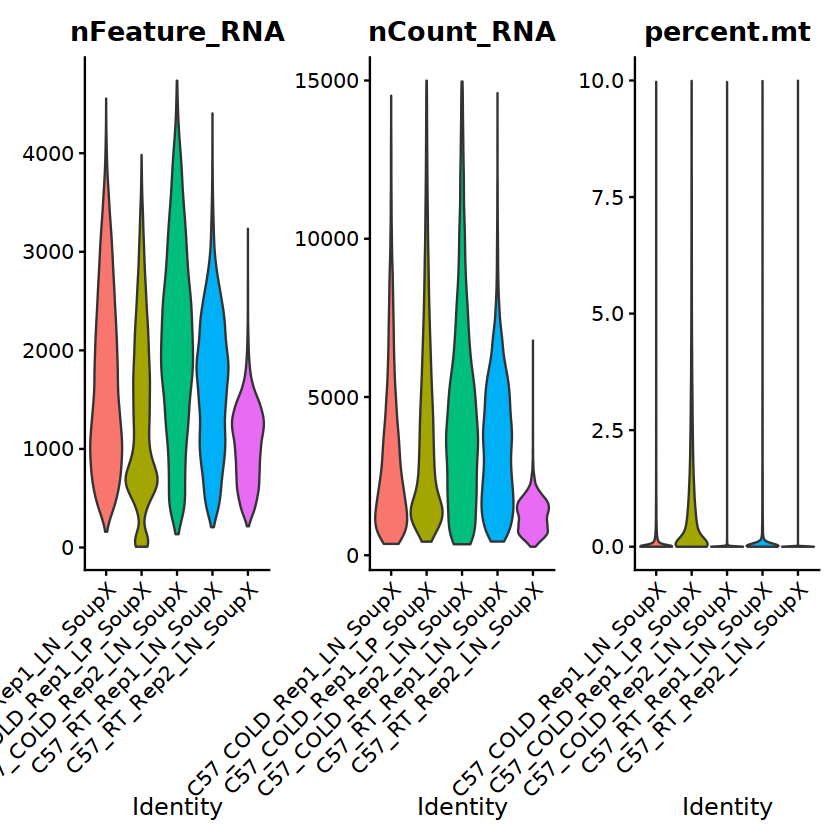

In [33]:
VlnPlot(combined, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), group.by = 'orig.ident',
        ncol = 3, pt.size = 0)


In [ ]:

## create cellchat object
cond = 'CONTROL'
cellchat <- createCellChat(object = subset(combined, Treatment == cond)@assays$RNA@data,
                           meta = subset(combined, Treatment == cond)@meta.data, group.by = "celltype")

## cellchat
CellChatDB <- CellChatDB.mouse # use CellChatDB.mouse if running on mouse data
CellChatDB.use <- CellChatDB#subsetDB(CellChatDB, search = "Secreted Signaling") # use Secreted Signaling
cellchat@DB <- CellChatDB.use

cellchat <- subsetData(cellchat) # This step is necessary even if using the whole database
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)

##Compute the communication probability and infer cellular communication network
cellchat <- computeCommunProb(cellchat)
# Filter out the cell-cell communication if there are only few number of cells in certain cell groups
cellchat <- filterCommunication(cellchat, min.cells = 10)

## Infer the cell-cell communication at a signaling pathway level
cellchat <- computeCommunProbPathway(cellchat)
## Calculate the aggregated cell-cell communication network
cellchat <- aggregateNet(cellchat)

saveRDS(cellchat, paste0('C57_RTCOLD_combined_Analysis_cellchat_', cond, '.rds'))



Create a CellChat object from a data matrix

Set cell identities for the new CellChat object



The cell groups used for CellChat analysis are  ASC1 ASC1-3 ASC2 Blym DEND1 DEND2 DEND3 DEND4 MAC1 MAC2 MAC3 MONO NEUT NKT Prolif/Diff RBC RET Schwann Tlym VEC VSMC 
Issue identified!! Please check the official Gene Symbol of the following genes:  
 H2-Q8 H2-T9 H2-T18 H2-Q9 H2-L H2-BI H2-D H60a H2-Ea-ps 


Create a CellChat object from a data matrix

Set cell identities for the new CellChat object



In [7]:

## create cellchat object
cond = 'COLD'
cellchat <- createCellChat(object = subset(combined, Treatment == cond)@assays$RNA@data,
                           meta = subset(combined, Treatment == cond)@meta.data, group.by = "celltype")

## cellchat
CellChatDB <- CellChatDB.mouse # use CellChatDB.mouse if running on mouse data
CellChatDB.use <- CellChatDB#subsetDB(CellChatDB, search = "Secreted Signaling") # use Secreted Signaling
cellchat@DB <- CellChatDB.use

cellchat <- subsetData(cellchat) # This step is necessary even if using the whole database
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)

##Compute the communication probability and infer cellular communication network
cellchat <- computeCommunProb(cellchat)
# Filter out the cell-cell communication if there are only few number of cells in certain cell groups
cellchat <- filterCommunication(cellchat, min.cells = 10)

## Infer the cell-cell communication at a signaling pathway level
cellchat <- computeCommunProbPathway(cellchat)
## Calculate the aggregated cell-cell communication network
cellchat <- aggregateNet(cellchat)

saveRDS(cellchat, paste0('C57_RTCOLD_combined_Analysis_cellchat_', cond, '.rds'))



Create a CellChat object from a data matrix

Set cell identities for the new CellChat object



The cell groups used for CellChat analysis are  ASC1 ASC1-3 ASC2 Blym DEND1 DEND2 DEND3 DEND4 MAC1 MAC2 MAC3 MONO NEUT NKT Prolif/Diff RBC RET Schwann Tlym VEC VSMC 
Issue identified!! Please check the official Gene Symbol of the following genes:  
 H2-Q8 H2-T9 H2-T18 H2-Q9 H2-L H2-BI H2-D H60a H2-Ea-ps 


In [3]:
cond = 'COLD'
cellchat = readRDS(paste0('C57_RTCOLD_combined_Analysis_cellchat_', cond, '.rds'))


In [24]:
df <- as.data.frame(subsetCommunication(cellchat, thresh = 1))
df.net <- subset(df, pval < 0.05)
df.net$pair = paste(df.net$source, df.net$target, sep = '~')

## number of interaction for each cell type
source_df = as.data.frame(table(df.net[,c('source')]))
# reshape2::melt(plot_df, value.name = 'Freq')
source_df$Type = 'Sender'
target_df = as.data.frame(table(df.net[,c('target')]))
# reshape2::melt(plot_df, value.name = 'Freq')
target_df$Type = 'Receiver'

plot_df = rbind(source_df, target_df)
colnames(plot_df) = c('Cell_type', 'Count', 'Type')
levels(plot_df$Type) = c('Sender', 'Receiver')
plot_df$Cell_type = factor(as.vector(plot_df$Cell_type), levels = as.vector(source_df[order(-source_df$Freq),'Var1']))


g = ggplot(data = plot_df,
       aes(x = Cell_type, y = Count, fill = Type))+
       geom_bar(stat = 'identity', position = position_dodge(width = .9))+ggstyle+
    scale_fill_manual(values = c('Sender'='navy', 'Receiver'='darkred'))+
    xlab('')+ylab('Number of Communications')
pdf('commu_count_by_celltype_COLD_Day4_GSE207706.pdf', width = 6.5, height = 5)
print(g)
dev.off()



png 
  2

### APC subtypes, our data

In [25]:
cellchat_allcell = readRDS('./APCsub_ourdata/allcell_updated_celltype_APCsub_updated_cellchat.newrun.rds')


In [37]:
df <- as.data.frame(subsetCommunication(cellchat_allcell, thresh = 1))
# df$source_cond = do.call(rbind, strsplit(as.vector(df$source), '\\~~'))[,1]
# df$target_cond = do.call(rbind, strsplit(as.vector(df$target), '\\~~'))[,1]
# df = subset(df, source_cond == target_cond)


## circle plot for each condition
title = 'All Cells'
pdf('./APCsub_ourdata/allcell_CellChat_NetPlot_updated.pdf')
tdf = subset(df, pval < 0.05)
# tdf$source = gsub(paste0(condition, '~'), '', as.vector(tdf$source))
# tdf$target = gsub(paste0(condition, '~'), '', as.vector(tdf$target))
groupSize <- table(c(tdf$source, tdf$target))
dc = as.data.frame(table(tdf[,c('source', 'target')]))
dc = reshape2::acast(dc, formula = source ~ target)
dc = dc[sort(rownames(dc)), sort(rownames(dc))]
# colnames(dc) = gsub(paste0(condition, '~'), '', colnames(dc))
# rownames(dc) = gsub(paste0(condition, '~'), '', rownames(dc))

g = netVisual_circle(dc, vertex.weight = groupSize[rownames(dc)], vertex.weight.max = 1000,
                 weight.scale = T, label.edge= F, title.name = paste0(title, "\nNumber of interactions"),
                    alpha = .4, vertex.label.cex = .5)

title = 'Pdgfra_APC~15 source'
mat2 <- matrix(0, nrow = nrow(dc), ncol = ncol(dc), dimnames = dimnames(dc))
mat2['Pdgfra_APC~15', ] <- dc['Pdgfra_APC~15', ]
g = netVisual_circle(mat2, vertex.weight = groupSize[rownames(dc)], vertex.weight.max = 1000,
                 weight.scale = T, label.edge= F, title.name = paste0(title, "\nNumber of interactions"),
                    alpha = .4, vertex.label.cex = .5)
title = 'Pdgfra_APC~16 source'
mat2 <- matrix(0, nrow = nrow(dc), ncol = ncol(dc), dimnames = dimnames(dc))
mat2['Pdgfra_APC~16', ] <- dc['Pdgfra_APC~16', ]
g = netVisual_circle(mat2, vertex.weight = groupSize[rownames(dc)], vertex.weight.max = 1000,
                 weight.scale = T, label.edge= F, title.name = paste0(title, "\nNumber of interactions"),
                    alpha = .4, vertex.label.cex = .5)
title = 'Pdgfra_APC~15 target'
mat2 <- matrix(0, nrow = nrow(dc), ncol = ncol(dc), dimnames = dimnames(dc))
mat2[,'Pdgfra_APC~15'] <- dc[,'Pdgfra_APC~15']
g = netVisual_circle(mat2, vertex.weight = groupSize[rownames(dc)], vertex.weight.max = 1000,
                 weight.scale = T, label.edge= F, title.name = paste0(title, "\nNumber of interactions"),
                    alpha = .4, vertex.label.cex = .5)
title = 'Pdgfra_APC~16 target'
mat2 <- matrix(0, nrow = nrow(dc), ncol = ncol(dc), dimnames = dimnames(dc))
mat2[,'Pdgfra_APC~16'] <- dc[,'Pdgfra_APC~16']
g = netVisual_circle(mat2, vertex.weight = groupSize[rownames(dc)], vertex.weight.max = 1000,
                 weight.scale = T, label.edge= F, title.name = paste0(title, "\nNumber of interactions"),
                    alpha = .4, vertex.label.cex = .5)
# LR_net[[condition]] = tdf
dev.off()


Using Freq as value column: use value.var to override.



png 
  2

In [75]:
pdf('./APCsub_ourdata/allcell_CellChat_APCsub_LR_compare.pdf', width = 6, height = 15)
cells = c('Basophils', 'Bcells', 'CD8T', 'Cytotoxic_T', 'ILC2s', 'Macrophages', 'NK',
               'Treg', 'Neutrophils', 'CD4T')
g = netVisual_bubble(cellchat_allcell, sources.use = c('Pdgfra_APC~15', 'Pdgfra_APC~16'),
                 targets.use = cells,
                  remove.isolate = T)
l = NULL
for (x in cells){
    l = c(l, paste0('Pdgfra_APC~15 -> ', x), paste0('Pdgfra_APC~16 -> ', x))
}
levels(g$data$source.target) <- l
print(g)

cells = c('VSM', 'Lymph_EC', 'Pericytes', 'EC')
g = netVisual_bubble(cellchat_allcell, sources.use = c('Pdgfra_APC~15', 'Pdgfra_APC~16'),
                 targets.use = cells,
                  remove.isolate = T)
l = NULL
for (x in cells){
    l = c(l, paste0('Pdgfra_APC~15 -> ', x), paste0('Pdgfra_APC~16 -> ', x))
}
levels(g$data$source.target) <- l
print(g)

cells = c('NMSC', 'MSC')
g = netVisual_bubble(cellchat_allcell, sources.use = c('Pdgfra_APC~15', 'Pdgfra_APC~16'),
                 targets.use = cells,
                  remove.isolate = T)
l = NULL
for (x in cells){
    l = c(l, paste0('Pdgfra_APC~15 -> ', x), paste0('Pdgfra_APC~16 -> ', x))
}
levels(g$data$source.target) <- l
print(g)
dev.off()


Comparing communications on a single object 


Comparing communications on a single object 


Comparing communications on a single object 




png 
  2